#### Шаг 1. Откроем файл с данными и изучим общую информацию

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
calls = pd.read_csv('C:/Users/user/Desktop/Jupyter/ProjectYP3/datasets/calls.csv')
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [3]:
calls.head(10)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


 - id — уникальный номер звонка
 - call_date — дата звонка
 - duration — длительность звонка в минутах
 - user_id — идентификатор пользователя, сделавшего звонок

In [4]:
internet = pd.read_csv('C:/Users/user/Desktop/Jupyter/ProjectYP3/datasets/internet.csv')
internet.head(10)

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
5,5,1000_5,399.97,2018-10-02,1000
6,6,1000_6,540.08,2018-09-07,1000
7,7,1000_7,415.70,2018-07-11,1000
8,8,1000_8,505.40,2018-10-08,1000
9,9,1000_9,345.54,2018-09-03,1000


In [5]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


 - id — уникальный номер сессии
 - mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
 - session_date — дата интернет-сессии
 - user_id — идентификатор пользователя

In [6]:
messages = pd.read_csv('C:/Users/user/Desktop/Jupyter/ProjectYP3/datasets/messages.csv')
messages.head(10)

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


 - id — уникальный номер сообщения
 - message_date — дата сообщения
 - user_id — идентификатор пользователя, отправившего сообщение

In [7]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [8]:
tariffs = pd.read_csv('C:/Users/user/Desktop/Jupyter/ProjectYP3/datasets/tariffs.csv')
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


- tariff_name — название тарифа
- rub_monthly_fee — ежемесячная абонентская плата в рублях
- minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
- messages_included — количество сообщений в месяц, включённых в абонентскую плату
- mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
- rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
- rub_per_message — стоимость отправки сообщения сверх тарифного пакета
- rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

«Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута.

In [9]:
users = pd.read_csv('C:/Users/user/Desktop/Jupyter/ProjectYP3/datasets/users.csv')
users.head(10)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


- user_id — уникальный идентификатор пользователя
- first_name — имя пользователя
- last_name — фамилия пользователя
- age — возраст пользователя (годы)
- reg_date — дата подключения тарифа (день, месяц, год)
- churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
- city — город проживания пользователя
- tariff — название тарифного плана

In [10]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


#### Вывод: 
- в датафрейме "calls" в столбце "duration" есть нулевые значения, по зданию они являются ошибочными и их надо предобработать, поскольку в условиях задачи указано, что "Мегалайн" всегда округляет значения вверх, можно предобработать их, заменив на единицу;
- во всех представленных выше датафреймах колонка с датами имеет тип "object", их необходимо заменить на "datetime";
- в датафрейме "users" в столбце "churn_date" имеются пропущенные значения, по условию, если значения пропущены, значит, тариф действовал на момент выгрузки данных. Данные пропуски игнорируем.
- в датафрейме "internet" есть столбец "Unnamed", который дублирует индексы датафрейма. Возможно, он появился при выгрузке данных, его можно удалить.

#### Шаг 2. Подготовим данные:

In [11]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')

In [12]:
calls['user_id'] = calls['user_id'].astype(object)
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null datetime64[ns]
duration     202607 non-null float64
user_id      202607 non-null object
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 6.2+ MB


Значения столбца "call_date" заменили с "object" на "datetime", а столбец "id" с категории "int" на "object", поскольку id пользователя является категориадьным значением.

In [13]:
null_calls = calls[calls['duration'] == 0]
null_calls
#null_calls['call_date'].unique()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.0,1000
1,1000_1,2018-08-17,0.0,1000
5,1000_5,2018-11-02,0.0,1000
6,1000_6,2018-10-18,0.0,1000
9,1000_9,2018-08-15,0.0,1000
...,...,...,...,...
202590,1499_203,2018-12-03,0.0,1499
202592,1499_205,2018-10-13,0.0,1499
202593,1499_206,2018-12-26,0.0,1499
202594,1499_207,2018-10-28,0.0,1499


При просмотре датафрейма только с нулевыми значениями длительности вызова, можно прийти к выводу, что появления нулевых значений явно не связано с другими параметрами этого датафрейма.

In [14]:
calls.head(10)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


Можно увидеть, что значения длительности вызова не округлены в большую сторону (как того требует политика оператора).  
Поминутрная тарификация начинается с момента ответа абонента.  
Предположим, что нулевые значения появились оттого, что связь оборвалась, а длительность звонка составила доли секунды.   
Поскольку оператор длительность звонка округляет до минут в большую сторону, заменим все нули на единицы, а затем округлим значения до целых чисел в большую сторону. 

In [15]:
calls = calls.replace({'duration': {0: 1}})

In [16]:
calls['duration'] = calls['duration'].apply(np.ceil) 

In [17]:
mistake_count = 0
try:
    calls['duration'] = calls['duration'].astype(int)
except:
    mistake_count += 1
    
mistake_count

0

In [18]:
calls

,id,call_date,duration,user_id
0,1000_0,2018-07-25,1,1000
1,1000_1,2018-08-17,1,1000
2,1000_2,2018-06-11,3,1000
3,1000_3,2018-09-21,14,1000
4,1000_4,2018-12-15,6,1000
...,...,...,...,...
202602,1499_215,2018-12-26,1,1499
202603,1499_216,2018-10-18,19,1499
202604,1499_217,2018-11-10,11,1499
202605,1499_218,2018-10-06,5,1499


In [19]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [20]:
internet = internet.drop(internet.columns[0], axis='columns')
internet

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000
...,...,...,...,...
149391,1499_152,318.90,2018-10-03,1499
149392,1499_153,490.13,2018-12-14,1499
149393,1499_154,0.00,2018-10-27,1499
149394,1499_155,1246.32,2018-11-26,1499


In [21]:
mistake_count = 0
try:
    internet['user_id'] = internet['user_id'].astype(object)
except:
    mistake_count += 1
    
mistake_count

0

In [22]:
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')

In [23]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 4 columns):
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null datetime64[ns]
user_id         149396 non-null object
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 4.6+ MB


Столбец Unnamed удален, данные приведены к нужным типам.

In [24]:
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')

In [25]:
mistake_count = 0
try:
    messages['user_id'] = messages['user_id'].astype(object)
except:
    mistake_count += 1
    
mistake_count

0

In [26]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null datetime64[ns]
user_id         123036 non-null object
dtypes: datetime64[ns](1), object(2)
memory usage: 2.8+ MB


Данные приведены к нужным типам.

In [27]:
mistake_count = 0
try:
    users['user_id'] = users['user_id'].astype(object)
except:
    mistake_count += 1
    
mistake_count

0

In [28]:
users['churn_date'].unique() 

array([nan, '2018-10-05', '2018-12-18', '2018-11-21', '2018-10-03',
       '2018-10-14', '2018-12-09', '2018-12-11', '2018-12-26',
       '2018-08-31', '2018-12-03', '2018-12-23', '2018-11-07',
       '2018-12-16', '2018-12-20', '2018-11-30', '2018-12-21',
       '2018-08-17', '2018-09-02', '2018-10-04', '2018-11-13',
       '2018-11-22', '2018-10-28', '2018-11-26', '2018-11-27',
       '2018-11-16', '2018-10-27', '2018-12-30', '2018-09-27',
       '2018-12-25', '2018-12-14', '2018-12-24', '2018-09-26',
       '2018-10-25'], dtype=object)

In [29]:
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d', errors='ignore')

In [30]:
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d') 

In [31]:
users

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaT,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
...,...,...,...,...,...,...,...,...
495,1495,65,NaT,Иркутск,Авксентий,Фокин,2018-08-28,ultra
496,1496,36,NaT,Вологда,Трифон,Блохин,2018-01-27,smart
497,1497,32,NaT,Челябинск,Каролина,Агеева,2018-10-09,smart
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart


In [32]:
users['city'].unique()
#users['first_name'].unique()
#users['last_name'].unique()

array(['Краснодар', 'Москва', 'Стерлитамак', 'Новокузнецк',
       'Набережные Челны', 'Ульяновск', 'Челябинск', 'Пермь', 'Тюмень',
       'Самара', 'Санкт-Петербург', 'Иваново', 'Чебоксары', 'Омск', 'Уфа',
       'Томск', 'Чита', 'Мурманск', 'Петрозаводск', 'Тверь',
       'Екатеринбург', 'Махачкала', 'Вологда', 'Череповец', 'Ярославль',
       'Сочи', 'Хабаровск', 'Ставрополь', 'Рязань', 'Улан-Удэ', 'Тула',
       'Саратов', 'Ростов-на-Дону', 'Казань', 'Иркутск', 'Курск',
       'Калуга', 'Якутск', 'Астрахань', 'Химки', 'Владикавказ',
       'Волгоград', 'Саранск', 'Ижевск', 'Новосибирск', 'Брянск',
       'Тольятти', 'Нижний Тагил', 'Орёл', 'Белгород', 'Воронеж',
       'Волжский', 'Курган', 'Барнаул', 'Красноярск', 'Архангельск',
       'Липецк', 'Кемерово', 'Киров', 'Сургут', 'Пенза', 'Магнитогорск',
       'Нижний Новгород', 'Кострома', 'Владивосток', 'Тамбов', 'Балашиха',
       'Севастополь', 'Калининград', 'Оренбург', 'Смоленск',
       'Нижневартовск', 'Владимир', 'Новороссий

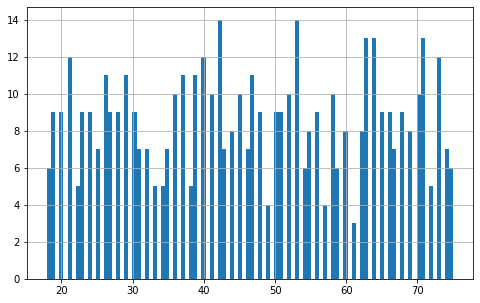

In [33]:
users['age'].hist(bins=100, figsize=(8,5))

В категориальных значениях датафрейма users каких-либо ошибочных значений не выявлено, в данных о возрасте аномальных значений не обнаружено. Данные приведены к нужным типам.

In [34]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null object
age           500 non-null int64
churn_date    38 non-null datetime64[ns]
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null datetime64[ns]
tariff        500 non-null object
dtypes: datetime64[ns](2), int64(1), object(5)
memory usage: 31.4+ KB


#### Вывод к шагу 1:
 - основные ошибки были выявлены в типах данных, например, столбец с датами имел тип object. В датафреймах данные были приведены к нужным типа методом astype(), а для выявления возможных ошибок применялась конструкция try-except;
 - в датафрейме internet был выялвен столбец Unnamed, который дублировал индексы данного датафрема. Вероятно, он появился после выгрузки данных;
 - были просмотрены такие категориальные значения, как названия городов, имена, фамилии на предмет ошибок (верхний, нижний регистр);
 - была построена гистограмма возраста в датафрейме users на предмет выявления аномальных значений. 

#### Посчитаем количество сделанных звонков и израсходованных минут разговора по месяцам

In [35]:
calls['month'] = calls['call_date'].dt.month

In [36]:
calls

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,1,1000,7
1,1000_1,2018-08-17,1,1000,8
2,1000_2,2018-06-11,3,1000,6
3,1000_3,2018-09-21,14,1000,9
4,1000_4,2018-12-15,6,1000,12
...,...,...,...,...,...
202602,1499_215,2018-12-26,1,1499,12
202603,1499_216,2018-10-18,19,1499,10
202604,1499_217,2018-11-10,11,1499,11
202605,1499_218,2018-10-06,5,1499,10


In [37]:
calls_month = calls.pivot_table(index=['user_id','month'], values='duration', aggfunc=('sum','count'))

In [38]:
calls_month = calls_month.reset_index()
calls_month

,user_id,month,count,sum
0,1000,5,22,164
1,1000,6,43,187
2,1000,7,47,346
3,1000,8,52,418
4,1000,9,58,478
...,...,...,...,...
3169,1498,10,41,258
3170,1499,9,9,71
3171,1499,10,68,473
3172,1499,11,74,624


Мы нашли количество звонков и израсходованных минут разговора по месяцам для каждого пользователя.

In [39]:
users_tariffs=users[['user_id','tariff']]
users_tariffs

,user_id,tariff
0,1000,ultra
1,1001,smart
2,1002,smart
3,1003,ultra
4,1004,ultra
...,...,...
495,1495,ultra
496,1496,smart
497,1497,smart
498,1498,smart


In [40]:
calls_month=calls_month.merge(right=users_tariffs, on='user_id',how='left')

In [41]:
calls_month

,user_id,month,count,sum,tariff
0,1000,5,22,164,ultra
1,1000,6,43,187,ultra
2,1000,7,47,346,ultra
3,1000,8,52,418,ultra
4,1000,9,58,478,ultra
...,...,...,...,...,...
3169,1498,10,41,258,smart
3170,1499,9,9,71,smart
3171,1499,10,68,473,smart
3172,1499,11,74,624,smart


#### Рассчитаем количество отправленных значений по месяцам.

In [42]:
messages['month'] = messages['message_date'].dt.month

In [43]:
messages

,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10
2,1000_2,2018-08-04,1000,8
3,1000_3,2018-06-16,1000,6
4,1000_4,2018-12-05,1000,12
...,...,...,...,...
123031,1499_179,2018-12-12,1499,12
123032,1499_180,2018-09-28,1499,9
123033,1499_181,2018-09-27,1499,9
123034,1499_182,2018-11-15,1499,11


In [44]:
messages_month = messages.pivot_table(index=['user_id','month'], values='id', aggfunc='count')

In [45]:
messages_month = messages_month.reset_index()

In [46]:
messages_month=messages_month.merge(right=users_tariffs, on='user_id',how='left')
messages_month

,user_id,month,id,tariff
0,1000,5,22,ultra
1,1000,6,60,ultra
2,1000,7,75,ultra
3,1000,8,81,ultra
4,1000,9,57,ultra
...,...,...,...,...
2712,1498,10,42,smart
2713,1499,9,11,smart
2714,1499,10,48,smart
2715,1499,11,59,smart


In [47]:
messages_month.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2717 entries, 0 to 2716
Data columns (total 4 columns):
user_id    2717 non-null object
month      2717 non-null int64
id         2717 non-null int64
tariff     2717 non-null object
dtypes: int64(2), object(2)
memory usage: 106.1+ KB


#### Рассчитаем объем израсходованного интернет-трафика по месяцам.

In [48]:
internet['month'] = internet['session_date'].dt.month
internet

,id,mb_used,session_date,user_id,month
0,1000_0,112.95,2018-11-25,1000,11
1,1000_1,1052.81,2018-09-07,1000,9
2,1000_2,1197.26,2018-06-25,1000,6
3,1000_3,550.27,2018-08-22,1000,8
4,1000_4,302.56,2018-09-24,1000,9
...,...,...,...,...,...
149391,1499_152,318.90,2018-10-03,1499,10
149392,1499_153,490.13,2018-12-14,1499,12
149393,1499_154,0.00,2018-10-27,1499,10
149394,1499_155,1246.32,2018-11-26,1499,11


In [49]:
internet_month = internet.pivot_table(index=['user_id','month'], values='mb_used', aggfunc='sum')

In [50]:
internet_month = internet_month.reset_index()
internet_month

,user_id,month,mb_used
0,1000,5,2253.49
1,1000,6,23233.77
2,1000,7,14003.64
3,1000,8,14055.93
4,1000,9,14568.91
...,...,...,...
3198,1498,10,20579.36
3199,1499,9,1845.75
3200,1499,10,17788.51
3201,1499,11,17963.31


In [51]:
internet_month=internet_month.merge(right=users_tariffs, on='user_id',how='left')
internet_month

,user_id,month,mb_used,tariff
0,1000,5,2253.49,ultra
1,1000,6,23233.77,ultra
2,1000,7,14003.64,ultra
3,1000,8,14055.93,ultra
4,1000,9,14568.91,ultra
...,...,...,...,...
3198,1498,10,20579.36,smart
3199,1499,9,1845.75,smart
3200,1499,10,17788.51,smart
3201,1499,11,17963.31,smart


Поскольку цена за трафик сверх пакета указана за 1 гигабайт, мегабайты необходимо перевести в гигабайты.

In [52]:
internet_month['gb_used'] = internet_month['mb_used'] / 1024

«Мегалайн» всегда округляет вверх значения мегабайтов.

In [53]:
internet_month['gb_used'] = internet_month['gb_used'].apply(np.ceil) 
internet_month['mb_used'] = internet_month['mb_used'].apply(np.ceil) 

In [54]:
internet_month

,user_id,month,mb_used,tariff,gb_used
0,1000,5,2254.0,ultra,3.0
1,1000,6,23234.0,ultra,23.0
2,1000,7,14004.0,ultra,14.0
3,1000,8,14056.0,ultra,14.0
4,1000,9,14569.0,ultra,15.0
...,...,...,...,...,...
3198,1498,10,20580.0,smart,21.0
3199,1499,9,1846.0,smart,2.0
3200,1499,10,17789.0,smart,18.0
3201,1499,11,17964.0,smart,18.0


#### Рассчитаем помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану).

In [55]:
pivot_data = internet_month[['user_id','month','tariff','gb_used']]

In [56]:
pivot_data['message'] = messages_month['id']

In [57]:
pivot_data['calls_minutes'] = calls_month['sum']

In [58]:
pivot_data

,user_id,month,tariff,gb_used,message,calls_minutes
0,1000,5,ultra,3.0,22.0,164.0
1,1000,6,ultra,23.0,60.0,187.0
2,1000,7,ultra,14.0,75.0,346.0
3,1000,8,ultra,14.0,81.0,418.0
4,1000,9,ultra,15.0,57.0,478.0
...,...,...,...,...,...,...
3198,1498,10,smart,21.0,NaN,NaN
3199,1499,9,smart,2.0,NaN,NaN
3200,1499,10,smart,18.0,NaN,NaN
3201,1499,11,smart,18.0,NaN,NaN


Пропущенные значения означают, что в данный месяц звонков или сообщений вообще не было, эти зачения можно заменить на нули. 

In [59]:
pivot_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3203 entries, 0 to 3202
Data columns (total 6 columns):
user_id          3203 non-null object
month            3203 non-null int64
tariff           3203 non-null object
gb_used          3203 non-null float64
message          2717 non-null float64
calls_minutes    3174 non-null float64
dtypes: float64(3), int64(1), object(2)
memory usage: 175.2+ KB


Можно заменитить, что пропусков в использованном трафике нет, то есть абонент звонил и писал сообщения с использованием только интернет-трафика.

In [60]:
pivot_data['message'] = pivot_data['message'].fillna(0)
pivot_data['calls_minutes'] = pivot_data['calls_minutes'].fillna(0)

In [61]:
pivot_data

,user_id,month,tariff,gb_used,message,calls_minutes
0,1000,5,ultra,3.0,22.0,164.0
1,1000,6,ultra,23.0,60.0,187.0
2,1000,7,ultra,14.0,75.0,346.0
3,1000,8,ultra,14.0,81.0,418.0
4,1000,9,ultra,15.0,57.0,478.0
...,...,...,...,...,...,...
3198,1498,10,smart,21.0,0.0,0.0
3199,1499,9,smart,2.0,0.0,0.0
3200,1499,10,smart,18.0,0.0,0.0
3201,1499,11,smart,18.0,0.0,0.0


In [62]:
tariffs.columns=['messages_included', 'mb_per_month_included', 'minutes_included',
       'rub_monthly_fee', 'rub_per_gb', 'rub_per_message', 'rub_per_minute',
       'tariff']
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [63]:
pivot_data = pivot_data.merge(right = tariffs, on='tariff', how='left')

In [64]:
pivot_data

,user_id,month,tariff,gb_used,message,calls_minutes,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5,ultra,3.0,22.0,164.0,1000,30720,3000,1950,150,1,1
1,1000,6,ultra,23.0,60.0,187.0,1000,30720,3000,1950,150,1,1
2,1000,7,ultra,14.0,75.0,346.0,1000,30720,3000,1950,150,1,1
3,1000,8,ultra,14.0,81.0,418.0,1000,30720,3000,1950,150,1,1
4,1000,9,ultra,15.0,57.0,478.0,1000,30720,3000,1950,150,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3198,1498,10,smart,21.0,0.0,0.0,50,15360,500,550,200,3,3
3199,1499,9,smart,2.0,0.0,0.0,50,15360,500,550,200,3,3
3200,1499,10,smart,18.0,0.0,0.0,50,15360,500,550,200,3,3
3201,1499,11,smart,18.0,0.0,0.0,50,15360,500,550,200,3,3


Поскольку трафик сверх пакета оплачивается за 1 гигабайт, то пакет мегабайт трафика, входящих в тариф необходимо перевести в гигабайты

In [65]:
pivot_data['mb_per_month_included'] = pivot_data['mb_per_month_included'] / 1024

In [66]:
pivot_data.columns = ['user_id', 'month', 'tariff', 'gb_used', 'message', 'calls_minutes',
       'messages_included', 'gb_per_month_included', 'minutes_included',
       'rub_monthly_fee', 'rub_per_gb', 'rub_per_message', 'rub_per_minute']

In [67]:
pivot_data

,user_id,month,tariff,gb_used,message,calls_minutes,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5,ultra,3.0,22.0,164.0,1000,30.0,3000,1950,150,1,1
1,1000,6,ultra,23.0,60.0,187.0,1000,30.0,3000,1950,150,1,1
2,1000,7,ultra,14.0,75.0,346.0,1000,30.0,3000,1950,150,1,1
3,1000,8,ultra,14.0,81.0,418.0,1000,30.0,3000,1950,150,1,1
4,1000,9,ultra,15.0,57.0,478.0,1000,30.0,3000,1950,150,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3198,1498,10,smart,21.0,0.0,0.0,50,15.0,500,550,200,3,3
3199,1499,9,smart,2.0,0.0,0.0,50,15.0,500,550,200,3,3
3200,1499,10,smart,18.0,0.0,0.0,50,15.0,500,550,200,3,3
3201,1499,11,smart,18.0,0.0,0.0,50,15.0,500,550,200,3,3


In [68]:
pivot_data['remain_calls'] = pivot_data['calls_minutes'] - pivot_data['minutes_included']

In [69]:
pivot_data_above_z = pivot_data[pivot_data['remain_calls'] >= 0]

In [70]:
pivot_data['remain_calls'] = (
    pivot_data['remain_calls']
    .where(pivot_data['remain_calls']
          .isin(pivot_data_above_z['remain_calls']), 0)
    )

In [71]:
pivot_data['revenue_calls'] = pivot_data['remain_calls'] * pivot_data['rub_per_minute']

In [72]:
pivot_data['remain_msg'] = pivot_data['message'] - pivot_data['messages_included']

In [73]:
pivot_data_above_zm = pivot_data[pivot_data['remain_msg'] >= 0]
pivot_data['remain_msg'] = (
    pivot_data['remain_msg']
    .where(pivot_data['remain_msg']
          .isin(pivot_data_above_zm['remain_msg']), 0)
    )

In [74]:
pivot_data['revenue_msg'] =  pivot_data['remain_msg'] * pivot_data['rub_per_message']

In [75]:
pivot_data['remain_traffic'] = pivot_data['gb_used'] - pivot_data['gb_per_month_included']

In [76]:
pivot_data_above_zt = pivot_data[pivot_data['remain_traffic'] >= 0]
pivot_data['remain_traffic'] = (
    pivot_data['remain_traffic']
    .where(pivot_data['remain_traffic']
          .isin(pivot_data_above_zt['remain_traffic']), 0)
    )

In [77]:
pivot_data['revenue_traffic'] = pivot_data['remain_traffic'] * pivot_data['rub_per_gb']

In [78]:
pivot_data['revenue'] = pivot_data['revenue_traffic'] + pivot_data['revenue_msg'] + pivot_data['revenue_calls'] + pivot_data['rub_monthly_fee']

In [79]:
pivot_data

,user_id,month,tariff,gb_used,message,calls_minutes,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,remain_calls,revenue_calls,remain_msg,revenue_msg,remain_traffic,revenue_traffic,revenue
0,1000,5,ultra,3.0,22.0,164.0,1000,30.0,3000,1950,150,1,1,0.0,0.0,0.0,0.0,0.0,0.0,1950.0
1,1000,6,ultra,23.0,60.0,187.0,1000,30.0,3000,1950,150,1,1,0.0,0.0,0.0,0.0,0.0,0.0,1950.0
2,1000,7,ultra,14.0,75.0,346.0,1000,30.0,3000,1950,150,1,1,0.0,0.0,0.0,0.0,0.0,0.0,1950.0
3,1000,8,ultra,14.0,81.0,418.0,1000,30.0,3000,1950,150,1,1,0.0,0.0,0.0,0.0,0.0,0.0,1950.0
4,1000,9,ultra,15.0,57.0,478.0,1000,30.0,3000,1950,150,1,1,0.0,0.0,0.0,0.0,0.0,0.0,1950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3198,1498,10,smart,21.0,0.0,0.0,50,15.0,500,550,200,3,3,0.0,0.0,0.0,0.0,6.0,1200.0,1750.0
3199,1499,9,smart,2.0,0.0,0.0,50,15.0,500,550,200,3,3,0.0,0.0,0.0,0.0,0.0,0.0,550.0
3200,1499,10,smart,18.0,0.0,0.0,50,15.0,500,550,200,3,3,0.0,0.0,0.0,0.0,3.0,600.0,1150.0
3201,1499,11,smart,18.0,0.0,0.0,50,15.0,500,550,200,3,3,0.0,0.0,0.0,0.0,3.0,600.0,1150.0


In [80]:
pivot_good_data = pivot_data[['user_id','month','tariff','gb_used','message','calls_minutes','revenue']]

In [81]:
pivot_good_data

,user_id,month,tariff,gb_used,message,calls_minutes,revenue
0,1000,5,ultra,3.0,22.0,164.0,1950.0
1,1000,6,ultra,23.0,60.0,187.0,1950.0
2,1000,7,ultra,14.0,75.0,346.0,1950.0
3,1000,8,ultra,14.0,81.0,418.0,1950.0
4,1000,9,ultra,15.0,57.0,478.0,1950.0
...,...,...,...,...,...,...,...
3198,1498,10,smart,21.0,0.0,0.0,1750.0
3199,1499,9,smart,2.0,0.0,0.0,550.0
3200,1499,10,smart,18.0,0.0,0.0,1150.0
3201,1499,11,smart,18.0,0.0,0.0,1150.0


Рассчитали выручку с каждого абонента по месяцам.

### Шаг 3. Анализ данных

#### Проанализируем данные для пользователей тарифа smart

In [82]:
pivot_good_data_smart = pivot_good_data[pivot_good_data['tariff'] == 'smart']
pivot_good_data_smart

,user_id,month,tariff,gb_used,message,calls_minutes,revenue
8,1001,11,smart,18.0,4.0,444.0,1150.0
9,1001,12,smart,14.0,11.0,430.0,550.0
10,1002,6,smart,11.0,13.0,118.0,550.0
11,1002,7,smart,18.0,4.0,219.0,1150.0
12,1002,8,smart,20.0,10.0,294.0,1550.0
...,...,...,...,...,...,...,...
3198,1498,10,smart,21.0,0.0,0.0,1750.0
3199,1499,9,smart,2.0,0.0,0.0,550.0
3200,1499,10,smart,18.0,0.0,0.0,1150.0
3201,1499,11,smart,18.0,0.0,0.0,1150.0


In [83]:
pivot_data_smart = pivot_good_data_smart.pivot_table(index='month', values=['gb_used','message','calls_minutes'], aggfunc = 'mean')

In [84]:
pivot_data_smart = pivot_data_smart.reset_index()
pivot_data_smart

,month,calls_minutes,gb_used,message
0,1,438.264706,8.735294,45.764706
1,2,453.965517,11.844828,37.810345
2,3,444.051948,15.233766,31.337662
3,4,415.232143,13.625000,31.062500
4,5,442.127660,15.907801,33.078014
5,6,463.591463,15.951220,37.256098
6,7,460.950249,15.875622,35.472637
7,8,456.487179,16.807692,40.508547
8,9,460.092308,16.392308,39.380769
9,10,444.034014,16.880952,40.619048


In [85]:
import seaborn as sns
import pylab

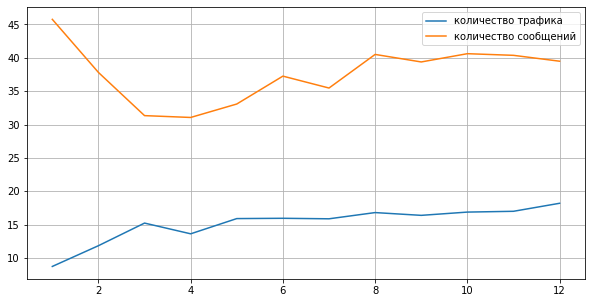

In [86]:
data2 = pivot_good_data_smart.groupby('month')['gb_used'].mean()
data3 = pivot_good_data_smart.groupby('month')['message'].mean()

def plotter():
    plt.figure(figsize=(10,5))
    plt.grid()
    plt.plot(data2, label='количество трафика')
    plt.plot(data3, label='количество сообщений')
    pylab.legend()
    plt.show()
    
plotter()

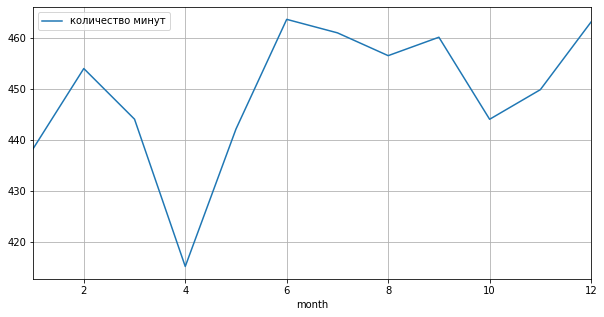

In [87]:
pivot_good_data_smart.groupby('month')['calls_minutes'].mean().plot(figsize=(10,5), grid=True, label='количество минут')
pylab.legend()

Рассчитаем общее среднее.

In [88]:
print('Среднее использованного трафика:',pivot_good_data_smart['gb_used'].mean())
print('Среднее использованных минут:',pivot_good_data_smart['calls_minutes'].mean())
print('Среднее использованных сообщений:',pivot_good_data_smart['message'].mean())

Среднее использованного трафика: 16.33617594254937
Среднее использованных минут: 452.4874326750449
Среднее использованных сообщений: 38.272890484739676


Рассчитаем дисперсию.

In [89]:
print('Дисперсия использованного кол-ва трафика:', np.var(pivot_good_data_smart['gb_used'], ddof=1))
print('Дисперсия использованного кол-ва минут:', np.var(pivot_good_data_smart['calls_minutes'], ddof=1))
print('Дисперсия использованного кол-ва сообщений:', np.var(pivot_good_data_smart['message'], ddof=1))

Дисперсия использованного кол-ва трафика: 32.92375582354318
Дисперсия использованного кол-ва минут: 55817.50186264694
Дисперсия использованного кол-ва сообщений: 1358.6915503301484


Найдем стандартное отклонение.

In [90]:
print('Стандартное отклонение использованного кол-ва трафика:', np.std(pivot_good_data_smart['gb_used'], ddof=1))
print('Стандартное отклонение использованного кол-ва минут:', np.std(pivot_good_data_smart['calls_minutes'], ddof=1))
print('Стандартное отклонение использованного кол-ва сообщний:', np.std(pivot_good_data_smart['message'], ddof=1))      

Стандартное отклонение использованного кол-ва трафика: 5.737922605224227
Стандартное отклонение использованного кол-ва минут: 236.2572789622511
Стандартное отклонение использованного кол-ва сообщний: 36.860433398566386


<Figure size 432x288 with 0 Axes>

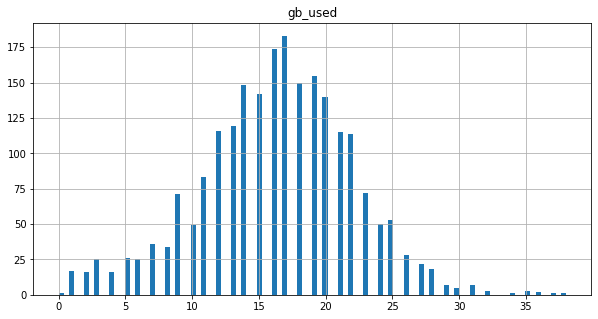

<Figure size 432x288 with 0 Axes>

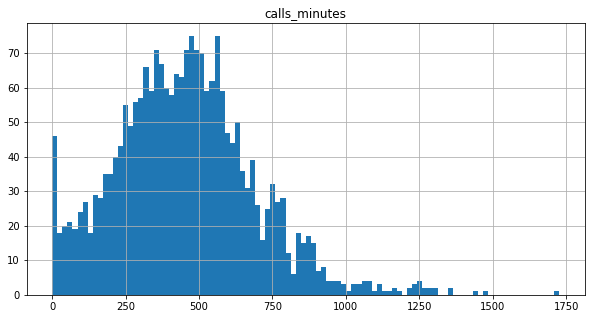

<Figure size 432x288 with 0 Axes>

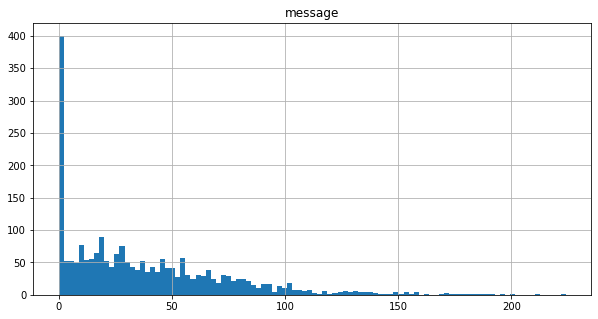

In [91]:
columns = ['gb_used', 'calls_minutes', 'message']

for column in columns:
    plt.figure()
    pivot_good_data_smart.hist([column], figsize=(10,5), bins=100)

На изображениях - нормальное распределение со скошенностью данных влево, поскольку данные состоят из неперывных величин.

#### Проанализируем данные для пользователей тарифа ultra.

In [92]:
pivot_good_data_ultra = pivot_good_data[pivot_good_data['tariff'] == 'ultra']
pivot_good_data_ultra

,user_id,month,tariff,gb_used,message,calls_minutes,revenue
0,1000,5,ultra,3.0,22.0,164.0,1950.0
1,1000,6,ultra,23.0,60.0,187.0,1950.0
2,1000,7,ultra,14.0,75.0,346.0,1950.0
3,1000,8,ultra,14.0,81.0,418.0,1950.0
4,1000,9,ultra,15.0,57.0,478.0,1950.0
...,...,...,...,...,...,...,...
3175,1495,8,ultra,3.0,0.0,0.0,1950.0
3176,1495,9,ultra,33.0,0.0,0.0,2400.0
3177,1495,10,ultra,29.0,0.0,0.0,1950.0
3178,1495,11,ultra,39.0,0.0,0.0,3300.0


In [93]:
pivot_data_ultra = pivot_good_data_ultra.pivot_table(index='month', values=['gb_used','message','calls_minutes'], aggfunc = 'mean')
pivot_data_ultra

,calls_minutes,gb_used,message
month,,,
1,569.222222,13.222222,34.333333
2,423.590909,13.090909,32.500000
3,461.702703,17.648649,40.027027
4,481.436364,16.963636,31.509091
5,447.318182,19.666667,36.454545
6,494.228916,19.168675,35.349398
7,509.800000,20.733333,39.377778
8,513.518868,19.783019,38.867925
9,498.421053,19.412281,40.596491


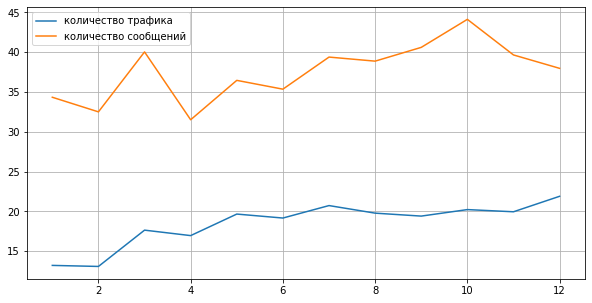

In [94]:
data4 = pivot_good_data_ultra.groupby('month')['gb_used'].mean()
data5 = pivot_good_data_ultra.groupby('month')['message'].mean()

def plotter():
    plt.figure(figsize=(10,5))
    plt.grid()
    plt.plot(data4, label='количество трафика')
    plt.plot(data5, label='количество сообщений')
    pylab.legend()
    plt.show()
    
plotter()

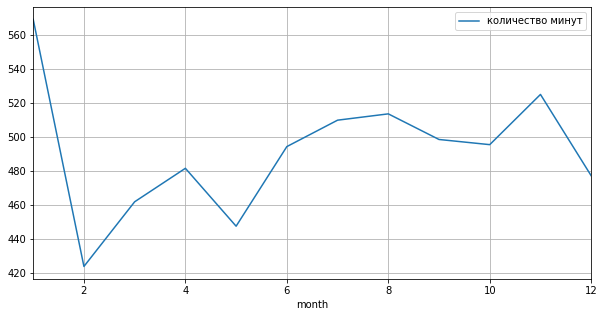

In [95]:
pivot_good_data_ultra.groupby('month')['calls_minutes'].mean().plot(figsize=(10,5), grid=True, label='количество минут')
pylab.legend()

Рассчитаем общее среднее.

In [96]:
print('Среднее использованного трафика:',pivot_good_data_ultra['gb_used'].mean())
print('Среднее использованных минут:',pivot_good_data_ultra['calls_minutes'].mean())
print('Среднее использованных сообщений:',pivot_good_data_ultra['message'].mean())

Среднее использованного трафика: 19.694358974358973
Среднее использованных минут: 494.1251282051282
Среднее использованных сообщений: 38.73230769230769


Рассчитаем дисперсию.

In [97]:
print('Дисперсия использованного кол-ва трафика:', np.var(pivot_good_data_ultra['gb_used'], ddof=1))
print('Дисперсия использованного кол-ва минут:', np.var(pivot_good_data_ultra['calls_minutes'], ddof=1))
print('Дисперсия использованного кол-ва сообщений:', np.var(pivot_good_data_ultra['message'], ddof=1))

Дисперсия использованного кол-ва трафика: 94.1467340599167
Дисперсия использованного кол-ва минут: 71487.87549728845
Дисперсия использованного кол-ва сообщений: 1187.1736471331533


Найдем стандартное отклонение.

In [98]:
print('Стандартное отклонение использованного кол-ва трафика:', np.std(pivot_good_data_ultra['gb_used'], ddof=1))
print('Стандартное отклонение использованного кол-ва минут:', np.std(pivot_good_data_ultra['calls_minutes'], ddof=1))
print('Стандартное отклонение использованного кол-ва сообщний:', np.std(pivot_good_data_ultra['message'], ddof=1))   

Стандартное отклонение использованного кол-ва трафика: 9.702923995369472
Стандартное отклонение использованного кол-ва минут: 267.37216664658354
Стандартное отклонение использованного кол-ва сообщний: 34.45538632976205


Построим гистограммы.

<Figure size 432x288 with 0 Axes>

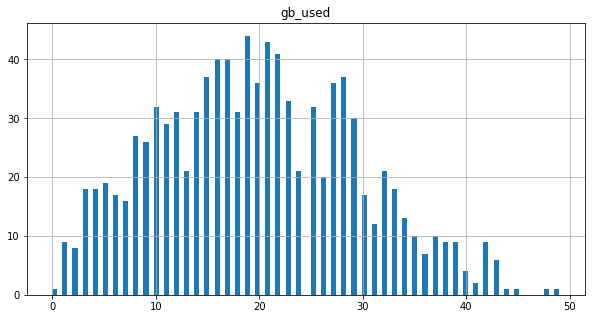

<Figure size 432x288 with 0 Axes>

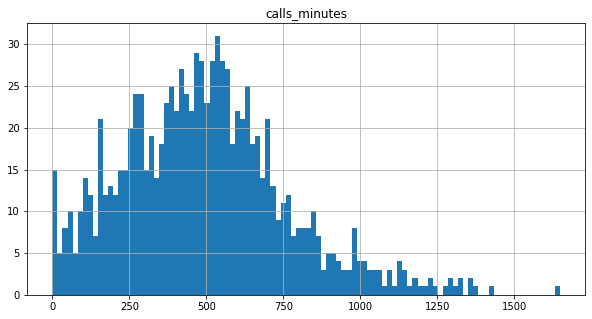

<Figure size 432x288 with 0 Axes>

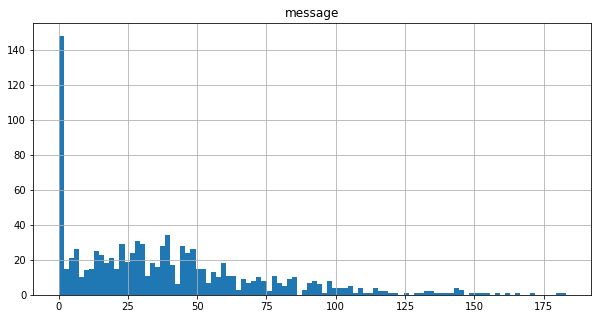

In [99]:
columns = ['gb_used', 'calls_minutes', 'message']

for column in columns:
    plt.figure()
    pivot_good_data_ultra.hist([column], figsize=(10,5), bins=100)

На данных графиках также отображено нормальное распределение со скошенностью значений влево.

#### Вывод:
В среднем пользователям тарифа smart требуется около 452 минут разговора, 16 ГБ интерет-трафика и 38 сообщений в месяц.  
В то же время, пользователям тарифа ultra требуется около 494 минут разговора, 20 ГБ интерне-трафика, и также 38 сообщений в месяц.

### Шаг 4. Проверим гипотезы:
    - средняя выручка пользователей тарифов «Ультра» и «Смарт» различается;
    - средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов;  

#### Проверим гипотезу: средняя выручка пользователей тарифов «Ультра» и «Смарт» различается.
Поскольку нулевая гипотеза формируется таким образом, чтобы использовать знак равентсва, в данном случае она будет выглядедь следующим образом: "средняя выручка пользователей тарифов «Ультра» и «Смарт» одинакова". Поскольку у нас есть по 1 выборке из двух генеральных совокупностей, для проверки гипотезы используем метод scipy.stats.ttest_ind (array1, array2, equal_var).  
Так как дисперсии у двух исследуемых выборок у нас неодинаковые, то параметру equal_var передаем значение False.

In [100]:
from scipy import stats as st

In [101]:
results = st.ttest_ind(
    pivot_good_data_ultra['revenue'], 
    pivot_good_data_smart['revenue'], 
    equal_var=False)

alpha = .05

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 6.202229957231193e-189
Отвергаем нулевую гипотезу


In [102]:
print('Средняя выручка с тарифа smart:', pivot_good_data_smart['revenue'].mean())
print('Средняя выручка с тарифа ultra:', pivot_good_data_ultra['revenue'].mean())

Средняя выручка с тарифа smart: 1391.3132854578098
Средняя выручка с тарифа ultra: 2071.3846153846152


#### Вывод: Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается.

#### Проверим гипотезу: средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.
Для этого необходимо произвести группировку пользователей тарифа по критерию: "Москва" и "другой город".

In [103]:
users_group = users[['user_id','city']]
users_group

,user_id,city
0,1000,Краснодар
1,1001,Москва
2,1002,Стерлитамак
3,1003,Москва
4,1004,Новокузнецк
...,...,...
495,1495,Иркутск
496,1496,Вологда
497,1497,Челябинск
498,1498,Владикавказ


In [104]:
pivot_good_data = pivot_good_data.merge(right=users_group, on='user_id', how='left')

In [105]:
pivot_good_data

,user_id,month,tariff,gb_used,message,calls_minutes,revenue,city
0,1000,5,ultra,3.0,22.0,164.0,1950.0,Краснодар
1,1000,6,ultra,23.0,60.0,187.0,1950.0,Краснодар
2,1000,7,ultra,14.0,75.0,346.0,1950.0,Краснодар
3,1000,8,ultra,14.0,81.0,418.0,1950.0,Краснодар
4,1000,9,ultra,15.0,57.0,478.0,1950.0,Краснодар
...,...,...,...,...,...,...,...,...
3198,1498,10,smart,21.0,0.0,0.0,1750.0,Владикавказ
3199,1499,9,smart,2.0,0.0,0.0,550.0,Пермь
3200,1499,10,smart,18.0,0.0,0.0,1150.0,Пермь
3201,1499,11,smart,18.0,0.0,0.0,1150.0,Пермь


In [106]:
def group_city(row):
    if row['city'] == 'Москва':
        return 'Москва'
    else:
        return 'другой город'
    
pivot_good_data['group_city'] = pivot_good_data.apply(group_city, axis = 1)    

In [107]:
pivot_good_data

,user_id,month,tariff,gb_used,message,calls_minutes,revenue,city,group_city
0,1000,5,ultra,3.0,22.0,164.0,1950.0,Краснодар,другой город
1,1000,6,ultra,23.0,60.0,187.0,1950.0,Краснодар,другой город
2,1000,7,ultra,14.0,75.0,346.0,1950.0,Краснодар,другой город
3,1000,8,ultra,14.0,81.0,418.0,1950.0,Краснодар,другой город
4,1000,9,ultra,15.0,57.0,478.0,1950.0,Краснодар,другой город
...,...,...,...,...,...,...,...,...,...
3198,1498,10,smart,21.0,0.0,0.0,1750.0,Владикавказ,другой город
3199,1499,9,smart,2.0,0.0,0.0,550.0,Пермь,другой город
3200,1499,10,smart,18.0,0.0,0.0,1150.0,Пермь,другой город
3201,1499,11,smart,18.0,0.0,0.0,1150.0,Пермь,другой город


In [108]:
data_moscow = pivot_good_data[pivot_good_data['group_city'] == 'Москва']

In [109]:
data_moscow

,user_id,month,tariff,gb_used,message,calls_minutes,revenue,city,group_city
8,1001,11,smart,18.0,4.0,444.0,1150.0,Москва,Москва
9,1001,12,smart,14.0,11.0,430.0,550.0,Москва,Москва
17,1003,8,ultra,9.0,83.0,392.0,1950.0,Москва,Москва
18,1003,9,ultra,13.0,94.0,990.0,1950.0,Москва,Москва
19,1003,10,ultra,15.0,75.0,866.0,1950.0,Москва,Москва
...,...,...,...,...,...,...,...,...,...
3147,1490,8,smart,17.0,0.0,830.0,1940.0,Москва,Москва
3148,1490,9,smart,15.0,0.0,1056.0,2218.0,Москва,Москва
3149,1490,10,smart,21.0,0.0,971.0,3163.0,Москва,Москва
3150,1490,11,smart,19.0,0.0,1066.0,3048.0,Москва,Москва


In [110]:
print('Дисперсия выручки по городу Москве:', np.var(data_moscow['revenue'], ddof=1))

Дисперсия выручки по городу Москве: 608106.6198384832


In [111]:
data_another_city = pivot_good_data[pivot_good_data['group_city'] == 'другой город']

In [112]:
data_another_city

,user_id,month,tariff,gb_used,message,calls_minutes,revenue,city,group_city
0,1000,5,ultra,3.0,22.0,164.0,1950.0,Краснодар,другой город
1,1000,6,ultra,23.0,60.0,187.0,1950.0,Краснодар,другой город
2,1000,7,ultra,14.0,75.0,346.0,1950.0,Краснодар,другой город
3,1000,8,ultra,14.0,81.0,418.0,1950.0,Краснодар,другой город
4,1000,9,ultra,15.0,57.0,478.0,1950.0,Краснодар,другой город
...,...,...,...,...,...,...,...,...,...
3198,1498,10,smart,21.0,0.0,0.0,1750.0,Владикавказ,другой город
3199,1499,9,smart,2.0,0.0,0.0,550.0,Пермь,другой город
3200,1499,10,smart,18.0,0.0,0.0,1150.0,Пермь,другой город
3201,1499,11,smart,18.0,0.0,0.0,1150.0,Пермь,другой город


In [113]:
print('Дисперсия выручки по другим городам:', np.var(data_another_city['revenue'], ddof=1))

Дисперсия выручки по другим городам: 648779.1822642082


Получили две разные выборки: по городу Москве и по остальным городам. Проверим гипотезу.  
Нулевая гипотеза будет звучать следующим образом: средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов.

In [114]:
results = st.ttest_ind(
    data_moscow['revenue'], 
    data_another_city['revenue'], 
    equal_var=False)

alpha = .05

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.209619429850799
Не получилось отвергнуть нулевую гипотезу


#### Вывод: средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов

### Шаг 5. Напишите общий вывод

#### Задача проекта.
Нам была представлена выборка из 500 абонентов федерального сотового оператора «Мегалайн». Нашей задачей было выяснить, какой из двух тарифов, «Смарт» и «Ультра», приносит больше денег, чтобы скорректировать рекламный бюджет.

#### Основные сложности и пути их решения:
- содержащиеся данные были некорректного типа, например, данные с датами звонков или сообщений имели тип object, а категориальное значение 'user_id' тип int. Такие типы данных были приведены к корректным с помощью функции astype(), для поиска и отработки ошибок использовалась конструкция try-except;
- данные столбца "churn_date" в датафрейме "users" содержали пропущенные значения, которые являлись по сути индикатором того, что на момент выгрузки данных абонет все еще пользовался услугами сотового оператора;
- содержащиеся нулевые значения в данных о длительности звонка были заменены на единицы, так как, вероятно, данные значения появились от звонков, длящихся доли секунд из-за обрыва связи, однако, такие звонки оператор округлял до минут;
- в датафрейме "internet" был удален столбец "Unnamed", который дублировал индексы датафрема
В основном все данные были без ошибок и пропусков, что не требовало длительной и трудоемкой предобработки. 

#### Основные выводы:
- было рассчитано количество минут разговора, использованного трафика и сообщний для каждого пользователя каждого тарифа ежемесячно;
##### Тариф Smart:
- представленное на графике среднее количество сообщений у пользователей данного тарифа в течение года практически не менялось, а вот среднее количество минут разговора и использованного трафика имеет тенденцию на увеличение;
- пользователям тарифа smart требуется в среднем около 452 минут разговора, 16 ГБ интерет-трафика и 38 сообщений в месяц;
##### Тариф Ultra:
- представленное на графике среднее количество минут разговора у пользователей данного тарифа в течение года практически не менялось, а вот среднее количество сообщений и использованного трафика имеет тенденцию на увеличение;
- пользователям тарифа ultra в среднем требуется около 494 минут разговора, 20 ГБ интерне-трафика, и также 38 сообщений в месяц.
##### Общие выводы:
- пользователи обоих тарифов в среднем тратят одинаковое количество сообщений, пользователи тарифа Ultra тратят больше минут разговора и интернет-трафика;
- средняя выручка с тарифа Ultra больше, чем с тарифа Smart;
- средняя выручка с обоих тарифов в Москве не отличается от таковой в других регионах;
- на основании вышесказанного, можно сделать вывод, что тариф Ultra лучше.